In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv')

In [3]:
backup = df.copy()

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df.isnull().sum() 

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [8]:
df.name.unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [9]:
len(df.name.unique())

525

In [10]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [11]:
df = df[df.year.str.isnumeric()]

In [12]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [13]:
df['year'] = df['year'].astype(int) 

In [14]:
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [15]:
df.Price.str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
888    False
889    False
890    False
891    False
Name: Price, Length: 842, dtype: bool

In [16]:
df['Price'] = df.Price.str.replace(',','')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [17]:
df = df[df.Price.str.isnumeric()]

In [18]:
df['Price'] = df['Price'].astype(int)

<ipython-input-18-e10c09f25e6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(int)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [20]:
df['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [21]:
df['kms_driven'].str.split(" ")

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object

In [22]:
df['kms_driven'] = df['kms_driven'].str.split(" ").str.get(0).str.replace(',','')

<ipython-input-22-9398d9deaeb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.split(" ").str.get(0).str.replace(',','')


In [23]:
df = df[df['kms_driven'].str.isnumeric()]

In [24]:
df['kms_driven'] = df['kms_driven'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [26]:
df['kms_driven'].isnull().sum()

0

In [27]:
df['fuel_type'].isnull().sum()

1

In [28]:
df[df['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [29]:
df = df[~df['fuel_type'].isna()]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [31]:
df['name'].str.split(" ")

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [32]:
df['name'].str.split(" ").str.slice(0,3).str.join(" ")

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [33]:
df['name'] = df['name'].str.split(" ").str.slice(0,3).str.join(" ")

In [34]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [35]:
df.reset_index(drop = True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [36]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


C:\Users\enoch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

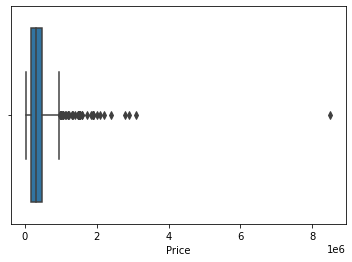

In [37]:
sns.boxplot(df['Price'])

In [38]:
df[df['Price']>6e6]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [39]:
df = df[df['Price']<6e6]
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [40]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [41]:
df.to_csv('Cleaned_quickr_car.')

# Model

In [42]:
X = df.drop(columns = 'Price')
y = df.Price

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [45]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [46]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
885,Tata Indica V2,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM,Tata,2018,27000,Diesel


In [47]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [48]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['name','company','fuel_type']),
                                      remainder='passthrough')

In [49]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petro

In [50]:
lr = LinearRegression()

In [51]:
pipe = make_pipeline(column_trans,lr)

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [53]:
y_pred = pipe.predict(X_test)

In [54]:

r2_score(y_test,y_pred)

0.73802599613003

In [55]:
scores = []
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [56]:
max(scores)

0.8897762920578806

In [57]:
np.argmax(scores)

661

In [58]:
scores

[0.7852425416626871,
 0.5125329954390436,
 0.6903320946309455,
 0.5995042932558412,
 0.8538307173340905,
 0.7472189241951475,
 0.6257517128888461,
 0.6859812152508706,
 0.7646095915730756,
 0.73107907342576,
 0.7654846579105726,
 0.7341363940421906,
 0.5286680768986561,
 0.7812697108516563,
 0.7117597835747632,
 0.7412162619379161,
 0.5183010746982475,
 0.7431758381735716,
 0.6922772193041478,
 0.666335921248951,
 0.6627204589297337,
 0.659681966534803,
 0.7953900427852743,
 0.6949410362984833,
 0.6238285036543223,
 0.5546422525689776,
 0.7012127316368841,
 0.8065760513718488,
 0.8203215574735424,
 0.5884488833358794,
 0.6060996093585919,
 0.6545492211358204,
 0.8020909897982367,
 0.8199756713172148,
 0.5838844997433108,
 0.6876507618557444,
 0.6410402433719927,
 0.7368449894097736,
 0.7158124581631142,
 0.7967664143803818,
 0.3873696009423042,
 0.6742412349226339,
 0.6427887874604843,
 0.7471040566389496,
 0.7504442114654077,
 0.780389917288528,
 0.6222725859651959,
 0.601226598489445

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_pred,y_test)

0.8624543839772674

In [60]:
import pickle

In [61]:
pickle.dump(pipe,open('Car_LinearRegressionMode.pkl','wb'))

In [62]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([400821.27275562])

In [63]:
import json

In [72]:
columns = {'name' : [x.lower() for x in X['name']]}

In [73]:
with open('name.json', 'w') as f:
    f.write(json.dumps(columns))

In [74]:
columns1 = {'company' : [x.lower() for x in X['company']]}

In [77]:
with open('company.json', 'w') as f:
    f.write(json.dumps(columns1))

AttributeError: 'dict' object has no attribute 'unique'